In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from cinnamon.drift import OutputDriftDetector

RANDOM_SEED = 2021

# Boston Housing Data

In [2]:
boston = datasets.load_boston()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_df.shape

(506, 13)

# Build XGBoost model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(boston_df, boston.target, test_size=0.3, random_state=RANDOM_SEED)

In [7]:
model = XGBRegressor(n_estimators=1000,
                   booster="gbtree",
                   objective="reg:squarederror",
                   learning_rate=0.05,
                   max_depth=6,
                   seed=RANDOM_SEED,
                   use_label_encoder=False)

In [8]:
model.fit(X=X_train, y=y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=20, verbose=10)

[0]	validation_0-rmse:21.91000
[10]	validation_0-rmse:13.70702
[20]	validation_0-rmse:8.88745
[30]	validation_0-rmse:6.22773
[40]	validation_0-rmse:4.80921
[50]	validation_0-rmse:4.08774
[60]	validation_0-rmse:3.78189
[70]	validation_0-rmse:3.64388
[80]	validation_0-rmse:3.56963
[90]	validation_0-rmse:3.55412
[100]	validation_0-rmse:3.55249
[110]	validation_0-rmse:3.54351
[120]	validation_0-rmse:3.53571
[130]	validation_0-rmse:3.52958
[140]	validation_0-rmse:3.52470
[150]	validation_0-rmse:3.52710
[160]	validation_0-rmse:3.53023
[162]	validation_0-rmse:3.52979


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1,
             random_state=2021, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=2021, subsample=1, tree_method='exact',
             use_label_encoder=False, validate_parameters=1, verbosity=None)

# OutputDriftDetector

The experiment is done with a random split so we should not detect a data drift

In [9]:
output_drift_detector = OutputDriftDetector(task='regression')

In [10]:
output_drift_detector.fit(model.predict(X_train), model.predict(X_test), y_train, y_test)

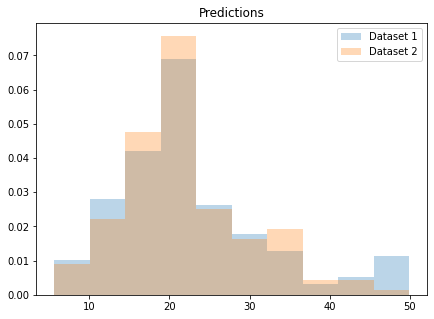

[DriftMetricsNum(mean_difference=-0.7889487954289152, wasserstein=1.0808420273082935, ks_test=BaseStatisticalTestResult(statistic=0.052743086529884034, pvalue=0.9096081584010307))]

In [11]:
output_drift_detector.plot_prediction_drift()
output_drift_detector.get_prediction_drift()

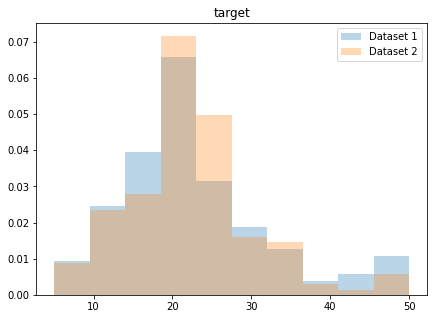

DriftMetricsNum(mean_difference=-0.609240261671129, wasserstein=1.3178114778471604, ks_test=BaseStatisticalTestResult(statistic=0.07857567647933393, pvalue=0.49680300786363996))

In [12]:
output_drift_detector.plot_target_drift()
output_drift_detector.get_target_drift()

In [13]:
output_drift_detector.get_performance_metrics_drift()

PerformanceMetricsDrift(dataset1=RegressionMetrics(mse=0.3643813701486243, explained_variance=0.9960752192224699), dataset2=RegressionMetrics(mse=12.419719495108291, explained_variance=0.8095694395593922))